In [1]:
# library
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from dpca import DensityPeakCluster
from sklearn import metrics
import pandas as pd
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("countries.csv")
df

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [3]:
df.isna().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [4]:
df = df.dropna()
df

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


# 1. Dựa vào dữ liệu, hiển thị tọa độ của theo lat và lon của các nước lên một bản đồ

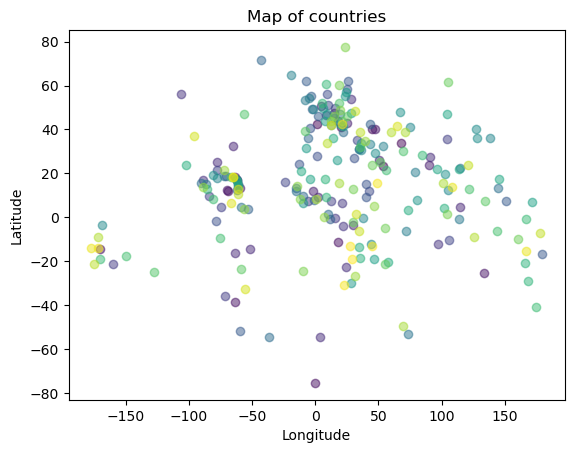

<Figure size 2000x1500 with 0 Axes>

In [5]:
countries = df['name']
# Tạo bản đồ
fig, ax = plt.subplots()

# Đặt giới hạn cho trục x và y
plt.figure(figsize=(20, 15))

# Tạo một bảng màu để đặt cho từng quốc gia một màu
color_map = plt.get_cmap('viridis', len(countries))

# Vẽ tọa độ của từng quốc gia với màu tương ứng
for i, country in enumerate(countries):
    country_df = df[df['name'] == country]
    ax.scatter(country_df['longitude'], country_df['latitude'], color=color_map(i), alpha=0.5, label=country)
    # alpha được sử dụng để đặt độ trong suốt của các điểm

# Đặt tên cho trục x và y
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Đặt tiêu đề cho bản đồ
ax.set_title('Map of countries')

# Thêm chú thích
#legend = ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# Hiển thị bản đồ
plt.show()

# 2. Phân cụm theo 3 thuật toán K-Means, DBSCAN, và DPC

# K-Means

In [6]:
df1 = df.copy()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df1.country = le.fit_transform(df1.country)
df1 = df1.drop("name", axis=1)
df1

,country,latitude,longitude
0,0,42.546245,1.601554
1,1,23.424076,53.847818
2,2,33.939110,67.709953
3,3,17.060816,-61.796428
4,4,18.220554,-63.068615
...,...,...,...
240,238,15.552727,48.516388
241,239,-12.827500,45.166244
242,240,-30.559482,22.937506
243,241,-13.133897,27.849332


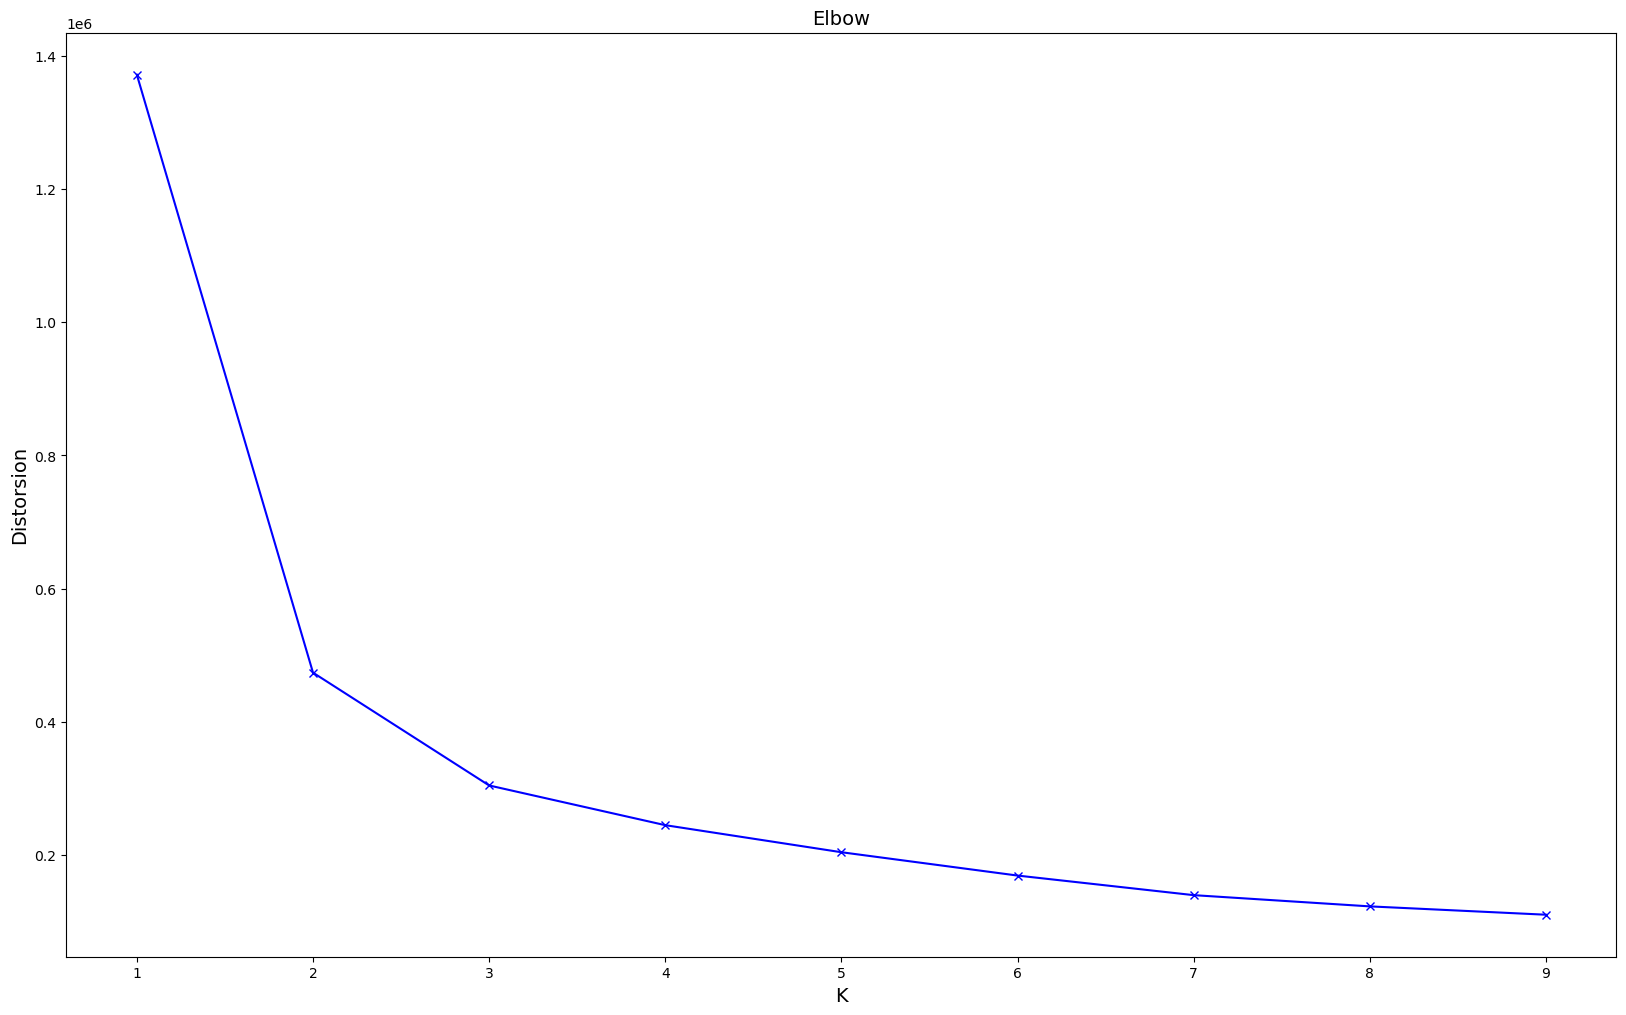

In [7]:
# Elbow
from sklearn.cluster import KMeans
distorsions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1.iloc[:,[0,1]])
    distorsions.append(kmeans.inertia_)
    
plt.figure(figsize=(20,12))
plt.plot(range(1,10),distorsions,'bx-')
plt.xlabel("K", fontsize = 14)
plt.ylabel("Distorsion", fontsize = 14)
plt.title("Elbow", fontsize = 14)
plt.show()

Vậy chọn k = 4 để phân cụm dữ liệu

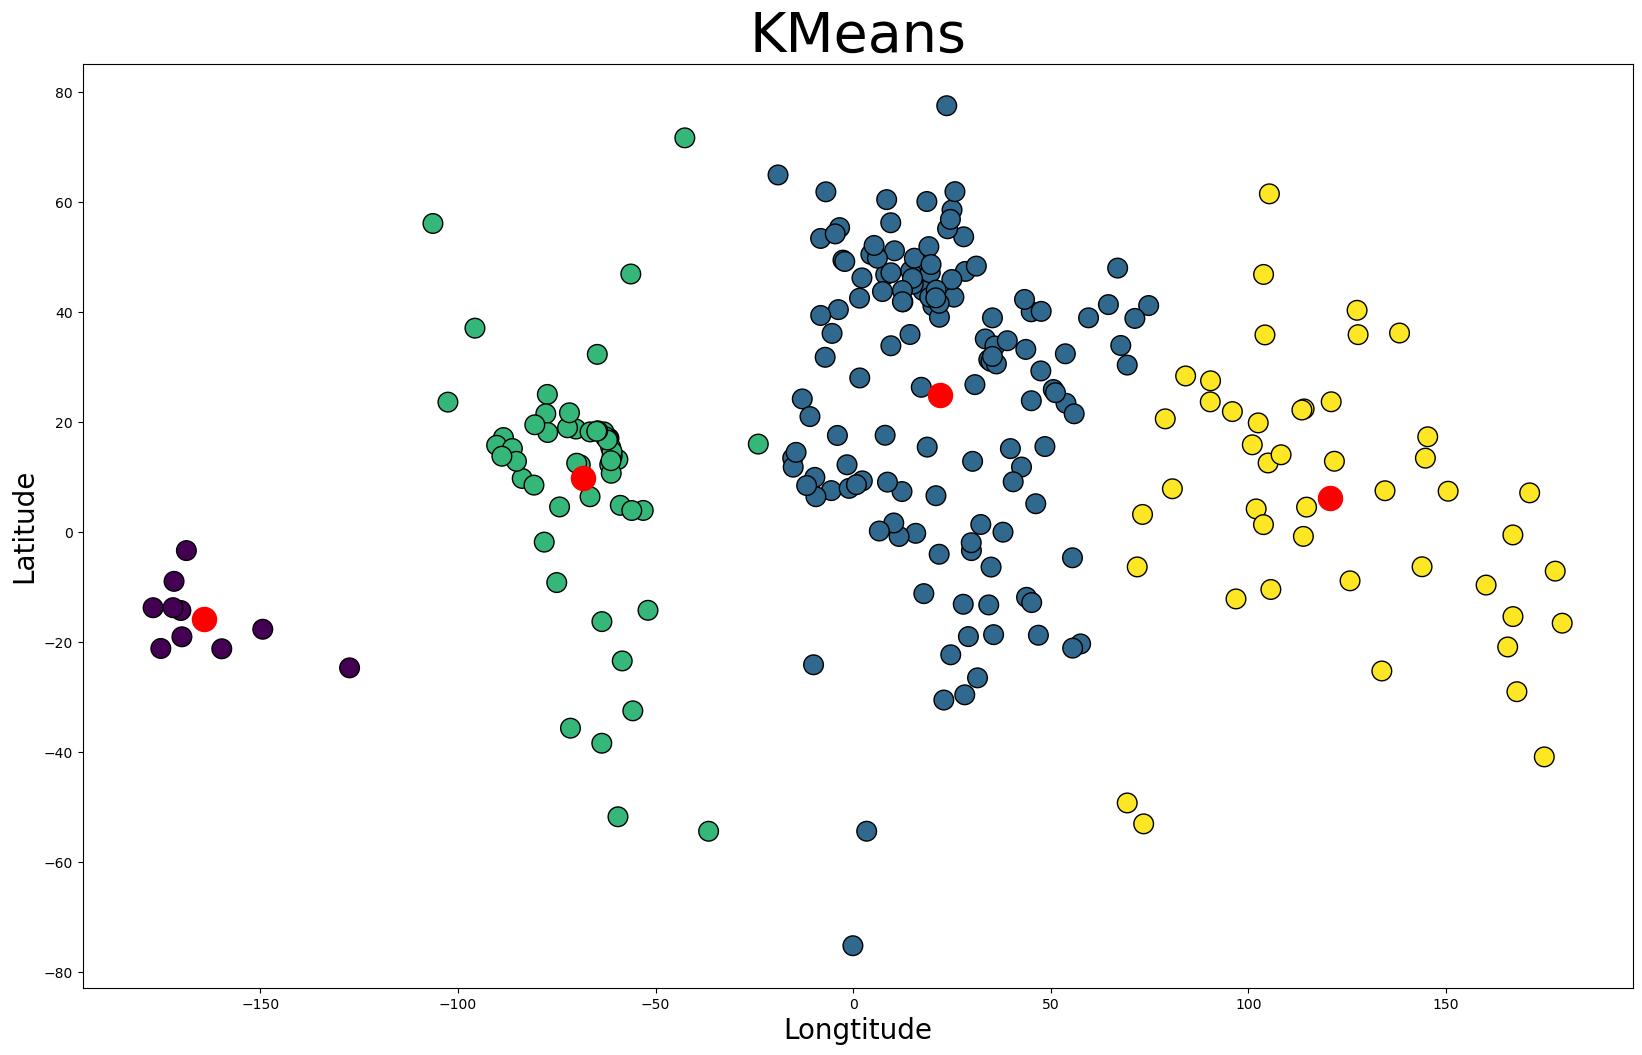

In [8]:
country = df1.iloc[:,[1,2]]
kmeans = KMeans(n_clusters = 4)
y_pred = kmeans.fit_predict(country)
centers = kmeans.cluster_centers_

# Show kết quả phân cụm
plt.figure(figsize=(20,12))
plt.scatter(
    df1.iloc[:,2], df1.iloc[:,1],
    c = y_pred, marker='o',
    edgecolor = 'black', s=200
)
plt.xlabel("Longtitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.scatter(centers[:, 1], centers[:, 0], c='red',s=300)
plt.title("KMeans", fontsize=40)
plt.show()

# DBSCAN

Text(0.5, 0, 'Epsilon distance')

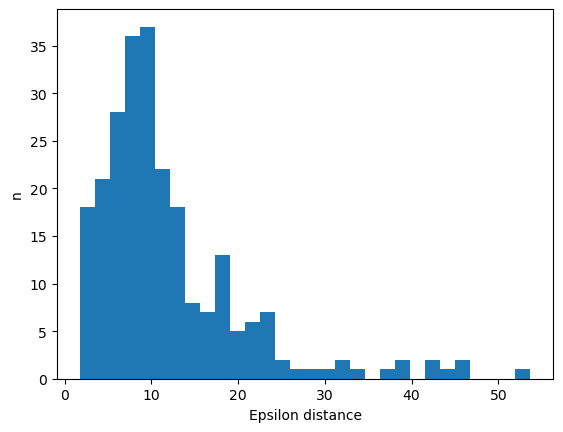

In [9]:
data_arr = np.array(df1)

def calculate_kn_distance(X,k):

    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X[i,2] - X[j,2]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))

        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance
eps_dist = calculate_kn_distance(data_arr, 5)
plt.hist(eps_dist,bins=30)
plt.ylabel('n')
plt.xlabel('Epsilon distance')

Từ biểu đồ, chọn eps = 20

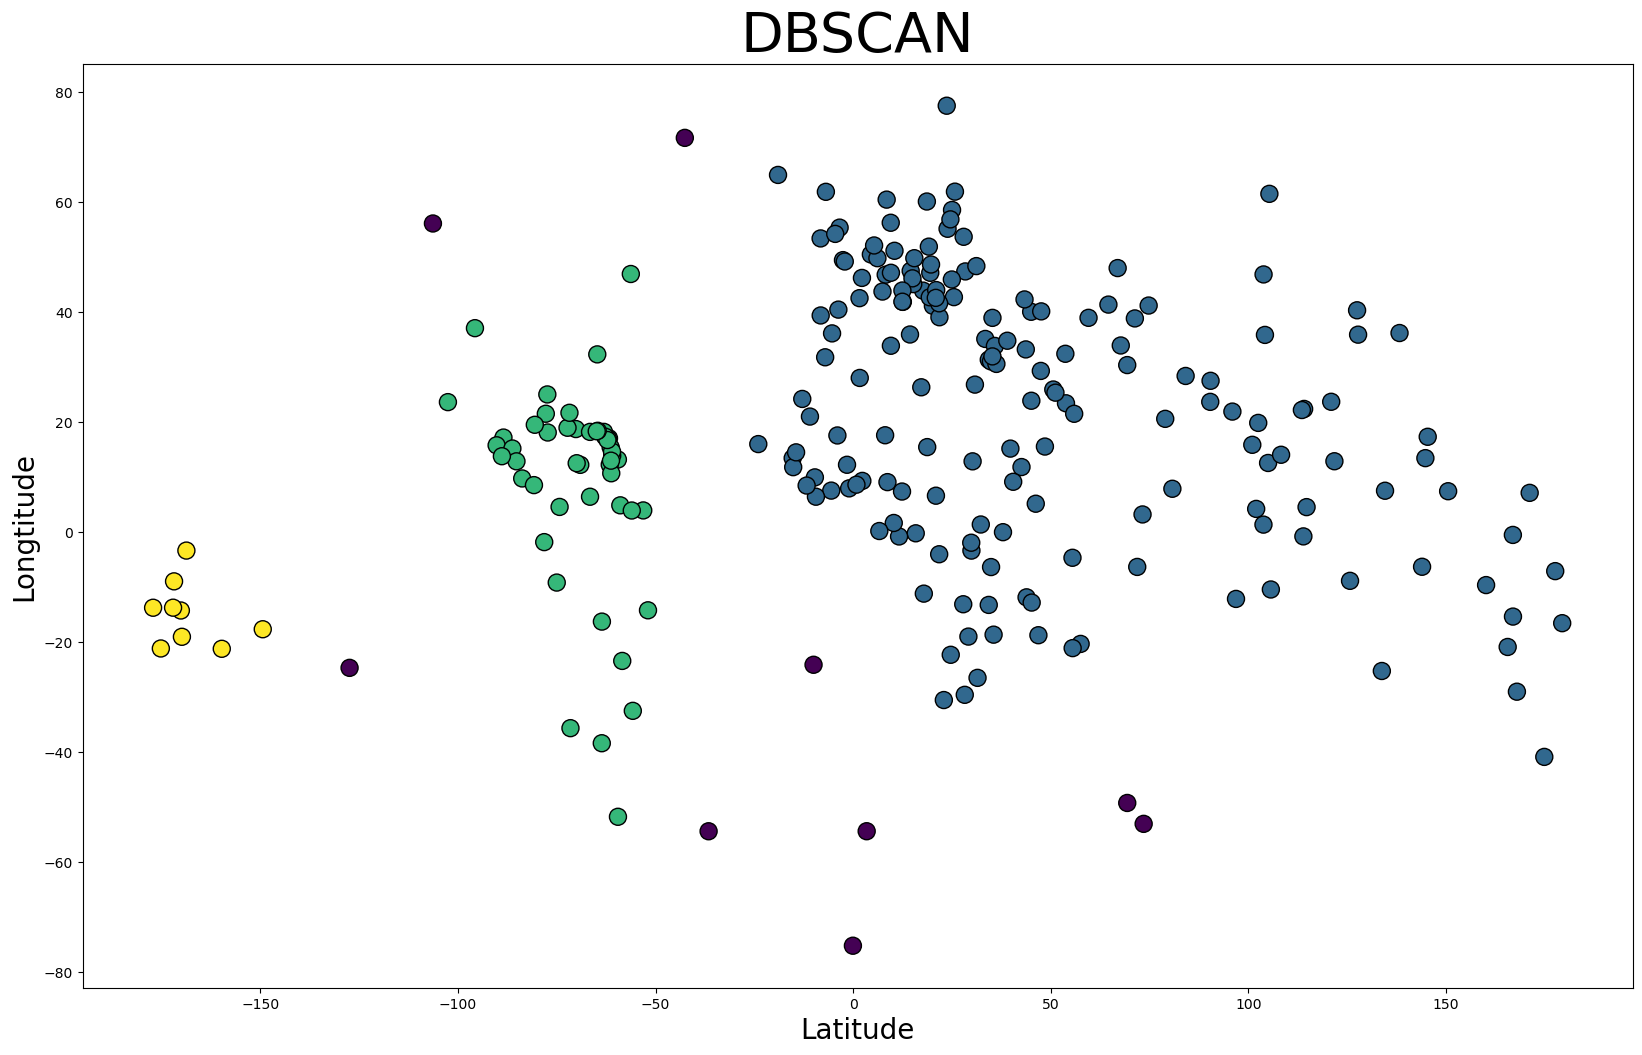

In [10]:
db = DBSCAN(eps=20, min_samples=3).fit(country)
y_pred_DB = db.fit_predict(country)

plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 2], data_arr[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=150
)
plt.xlabel("Latitude",fontsize=20)
plt.ylabel("Longtitude",fontsize=20)
plt.title("DBSCAN", fontsize=40)
plt.show()

# DPC

In [11]:
dpca = DensityPeakCluster( distance_threshold=60, anormal=False)
dpca.fit(df.iloc[:,[2,1]])

In [12]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()

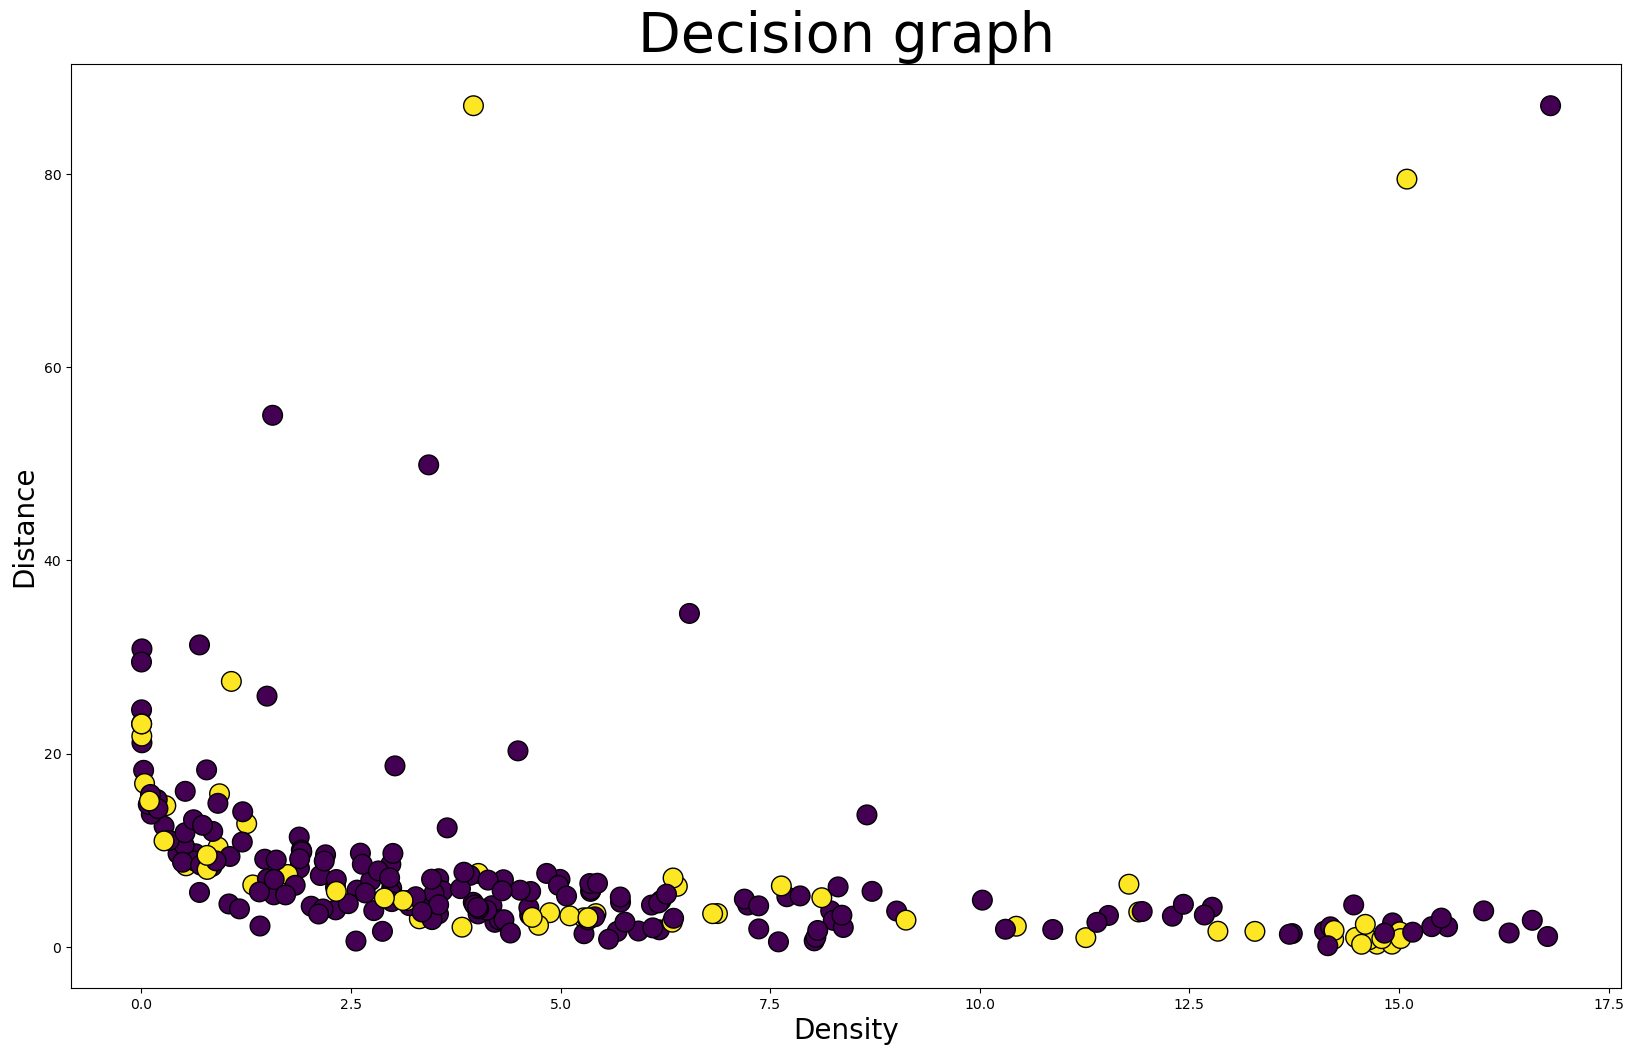

In [13]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title("Decision graph", fontsize=40)
plt.show()

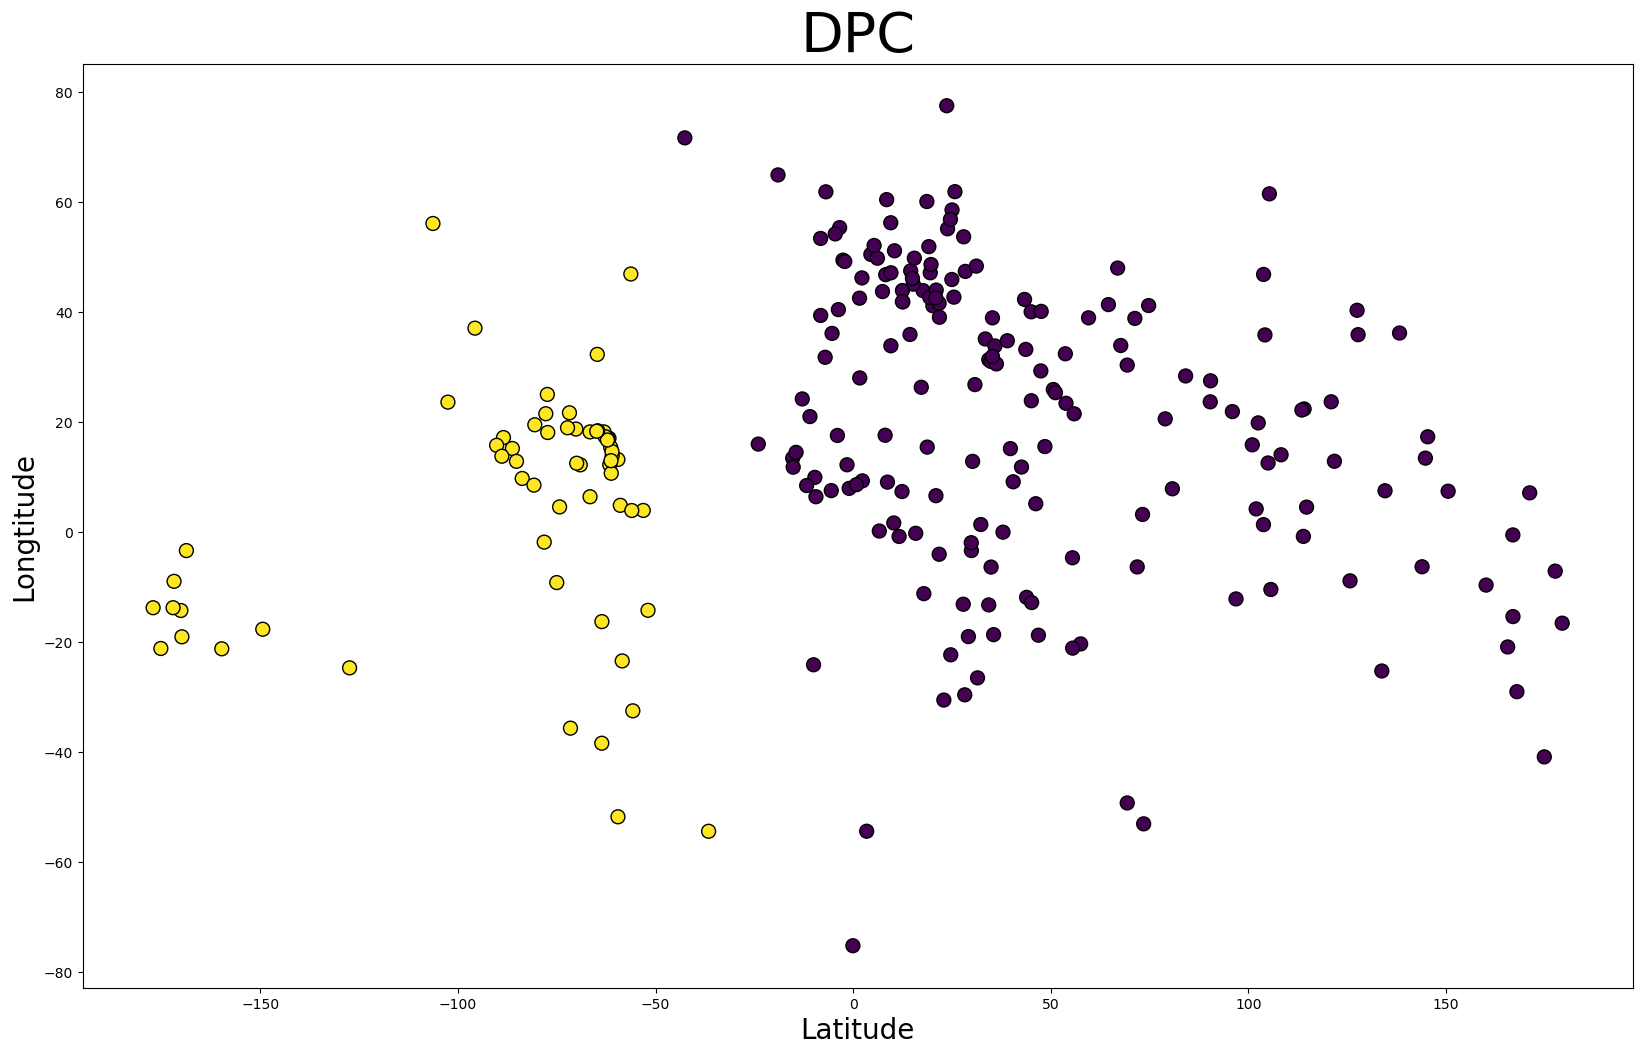

In [14]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:,2],data_arr[:,1],
    c=labels, marker='o',
    edgecolor='black', s=100
)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longtitude", fontsize=20)
plt.title("DPC", fontsize=40)
plt.show()

# 3. So sánh kết quả và nhận xét

- K-means yêu cầu định trước số lượng cụm và áp dụng một phương pháp tối ưu hóa để tìm ra trung tâm của các cụm đó. Tuy nhiên, với dữ liệu vị trí trên bản đồ, việc xác định số lượng cụm trước có thể là một thách thức, đặc biệt là khi không có thông tin rõ ràng về cấu trúc của dữ liệu. K-means cũng có thể bị ảnh hưởng bởi các điểm ngoại lai, gây ra sự sai lệch trong các kết quả phân cụm.

- DBSCAN là một thuật toán phân cụm dữ liệu không yêu cầu số lượng cụm được định trước và có khả năng xác định các điểm nhiễu. Nó cố gắng tìm ra các vùng có mật độ cao của các điểm dữ liệu và phân cụm chúng thành các cụm. Tuy nhiên, việc xác định các tham số cho thuật toán (như bán kính và số lượng điểm tối thiểu) có thể khá phức tạp và cần nhiều kiểm tra thử. Các kết quả phân cụm DBSCAN có thể bị ảnh hưởng bởi sự khác biệt trong mật độ dữ liệu giữa các vùng khác nhau trên bản đồ.

- DPC là một thuật toán phân cụm dữ liệu dựa trên cấu trúc đồ thị. Nó xác định các điểm trung tâm và sử dụng các cạnh của đồ thị để phân cụm dữ liệu. DPC có thể phát hiện được các cụm có hình dạng phức tạp và làm việc tốt với dữ liệu có nhiều điểm nhiễu. Tuy nhiên, việc xác định các tham số cho thuật toán có thể khó khăn và yêu cầu nhiều thử nghiệm.
